
Welcome to ImgSteg.py

1. Encode an Image.
            
2. Decode an Image.
            
3. Exit the program.
            
Select Option: 2

Image to decode: download_encoded.png


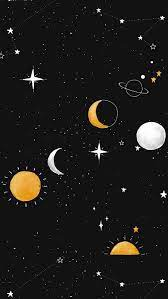


Your decoded message is: oraaafa


In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow as imshow

class Main:
    def __init__(self):
        self.delimiter = "*****"

    def open_image(self, img):
     try:
        image = cv2.imread(img, cv2.IMREAD_ANYCOLOR)
        if image is None:
            raise FileNotFoundError(f"Error: Unable to load image '{img}'. Please check the file path.")

        imshow(image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        return image
     except Exception as e:
        print(f"Error: {e}")
        quit()


    def data_to_binary(self, data):
        if type(data) == str:
            return ''.join(format(ord(i), '08b') for i in data)
        elif type(data) == np.ndarray:
            return [format(i, "08b") for i in data]

    def binary_to_char(self, binaryData):
        allBytes = [binaryData[i: i + 8] for i in range(0, len(binaryData), 8)]
        decodedData = ""
        for bytes in allBytes:
            decodedData += chr(int(bytes, 2))
        return decodedData

    def hide_text(self, image, hiddenMessage):
        totalBytes = image.size
        binaryMessage = self.data_to_binary(hiddenMessage + self.delimiter)
        binaryLength = len(binaryMessage)
        if binaryLength >= totalBytes:
            print("ERROR: Insufficient space. Please reduce the size of the message or select a bigger image.")
            quit()
        else:
            Index = 0
            for row in image:
                for pixel in row:
                    r, g, b = self.data_to_binary(pixel)
                    for x in range(3):
                        if Index < binaryLength:
                            channel = [r, g, b][x]
                            modifiedLSB = int(channel[:-1] + "0")
                            pixel[x] = modifiedLSB + int(binaryMessage[Index])
                            Index += 1
                    if Index >= binaryLength:
                        break
            return image

    def encode(self):
      print("===========================")
      fileName = input("\nImage Filename with Extension (PNG files only): ")
      if fileName.endswith("png"):
          img = self.open_image(fileName)
          encodeMessage = input("\nMessage to encode: ")
          if len(encodeMessage) == 0:
            print("\nERROR: Please add a message to encode!")
            quit()
          encodedImage = self.hide_text(img, encodeMessage)
          dest = (fileName.removesuffix(".png") + "_encoded.png")
          cv2.imwrite(dest, encodedImage)
          print("\nImage has been encoded successfully.")
          print(f"\nImage has been saved as {dest}.")
      else:
           print("\nERROR: Please supply a png image")
           quit()


    def decode(self):
        print("=========================")
        imageName = input("\nImage to decode: ")
        encodedImage = self.open_image(imageName)
        binaryMessage = ""
        for row in encodedImage:
            for pixels in row:
                r, g, b = self.data_to_binary(pixels)
                for x in range(3):
                    channel = [r, g, b][x]
                    binaryMessage += (channel[-1])
                    if self.delimiter in self.binary_to_char(binaryMessage):
                        text = self.binary_to_char(binaryMessage)
                        message = text.replace(self.delimiter, "")
                        return message

    def menu(self):
        while True:
            print("\nWelcome to ImgSteg.py")
            print("======================")
            choice = input("""\n1. Encode an Image.
            \n2. Decode an Image.
            \n3. Exit the program.
            \nSelect Option: """)
            if choice == "1":
                self.encode()
                print("=================================================================")
                break
            if choice == "2":
                print(f"\nYour decoded message is: {self.decode()}")
                print("=================================================================")
                break
            if choice == "3":
                print("======================")
                print("\nExiting....")
                print("=================================================================")
                exit()

if __name__ == "__main__":
    obj = Main()
    obj.menu()
